# Ensemble Methods


# Dataset Description: Telco Customer Churn Dataset

This dataset contains information about customers of a telecommunications company. The goal is to predict whether a customer will churn (leave the service). The details of the features and target variable are listed below:

## Features:
- **gender**: Gender of the customer
- **SeniorCitizen**: Whether the customer is a senior citizen (1) or not (0)
- **Partner**: Whether the customer has a partner
- **Dependents**: Whether the customer has dependents
- **tenure**: Number of months the customer has been with the company
- **PhoneService**: Whether the customer has phone service
- **MultipleLines**: Whether the customer has multiple lines
- **InternetService**: Type of internet service (DSL, Fiber optic, None)
- **OnlineSecurity**: Whether the customer has online security service
- **OnlineBackup**: Whether the customer has online backup service
- **DeviceProtection**: Whether the customer has device protection service
- **TechSupport**: Whether the customer has tech support service
- **StreamingTV**: Whether the customer has streaming TV service
- **StreamingMovies**: Whether the customer has streaming movies service
- **Contract**: Type of contract (Month-to-month, One year, Two year)
- **PaperlessBilling**: Whether the customer uses paperless billing
- **PaymentMethod**: Customer's payment method
- **MonthlyCharges**: The monthly charge paid by the customer
- **TotalCharges**: The total charges paid by the customer

## Objective:
The target variable (**Churn**) is binary (Yes/No), and the goal is to predict whether a customer will churn based on the given features.

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import tree

from sklearn.metrics import accuracy_score, brier_score_loss
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import ParameterGrid

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

## Question 1: Decision Trees


**1.1: Load the Telco Customer Churn Dataset and inspect its structure.**


In [246]:
## YOUR CODE HERE
df=pd.read_csv('/content/Telco-Customer-Churn-1.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



**Run the code below to convert TotalCharges to numeric**


In [248]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**1.2: Are there any missing values in the dataset? If yes, how do you plan to handle them?**

In [250]:
## YOUR CODE HERE
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [251]:
## YOUR CODE HERE
df['TotalCharges'] = df.groupby('Churn')['TotalCharges'].transform(lambda x: x.fillna(x.mean()))
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Add comment here**

Yes, there are 11 missing values in the column 'TotalCharges'. Since it's a numeric feature, I would suggest filling the NAs with the mean of the 'TotalCharges' in each of the target variable's class (Churn='Yes' and Churn='No'). It's generally better to fill "NA" values with the mean of a specific class (i.e., the mean of that particular category) rather than the overall column mean, especially when dealing with categorical data, as this preserves the class distribution and can provide a more accurate results. On top of that there's also class imbalance, hence to not worsen the imbalance, I used this method.


**1.3: Plot side-by-side bars of class distribution for each categorical feature in the dataset with respect to the target variable. Drop unique identifier "customerID"**


In [252]:
df.drop(['customerID'], axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


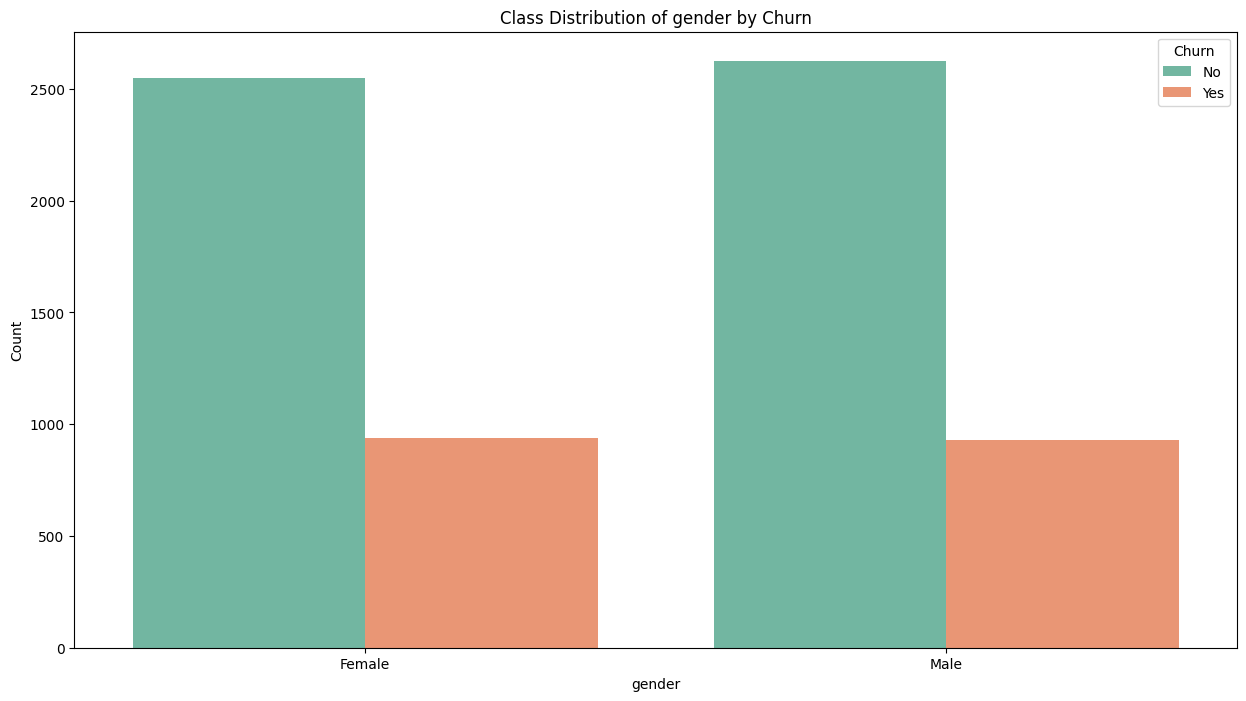

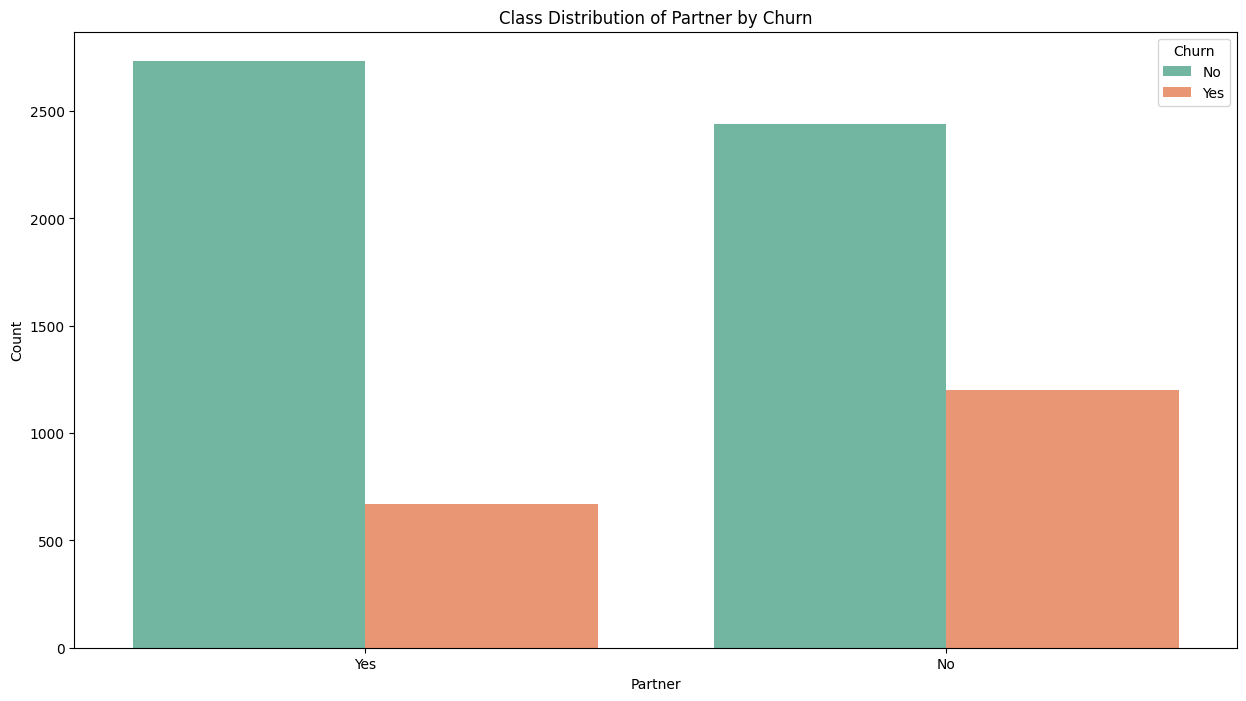

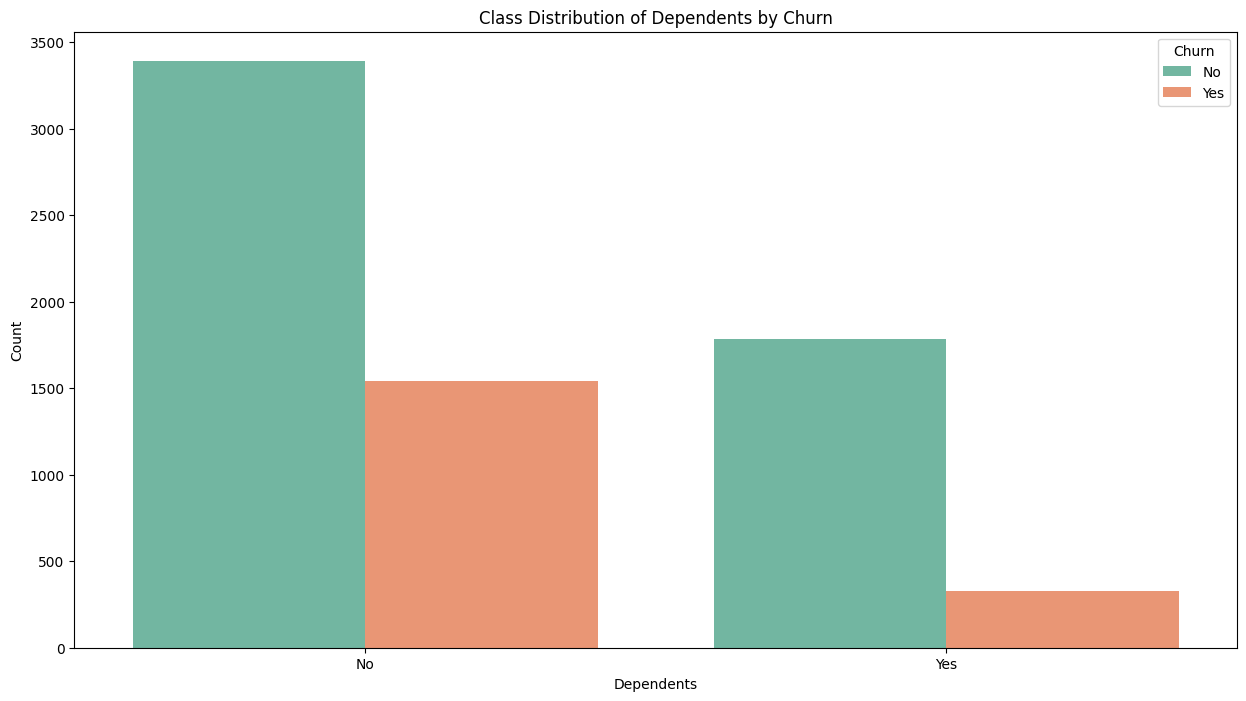

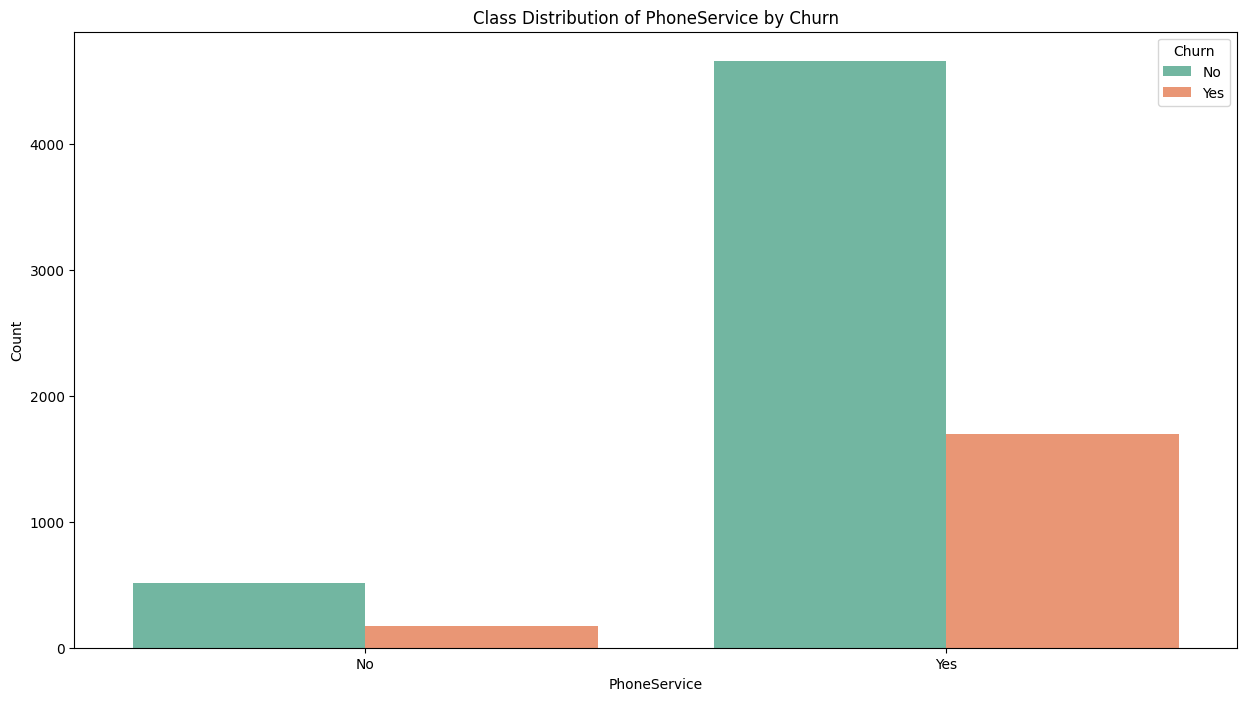

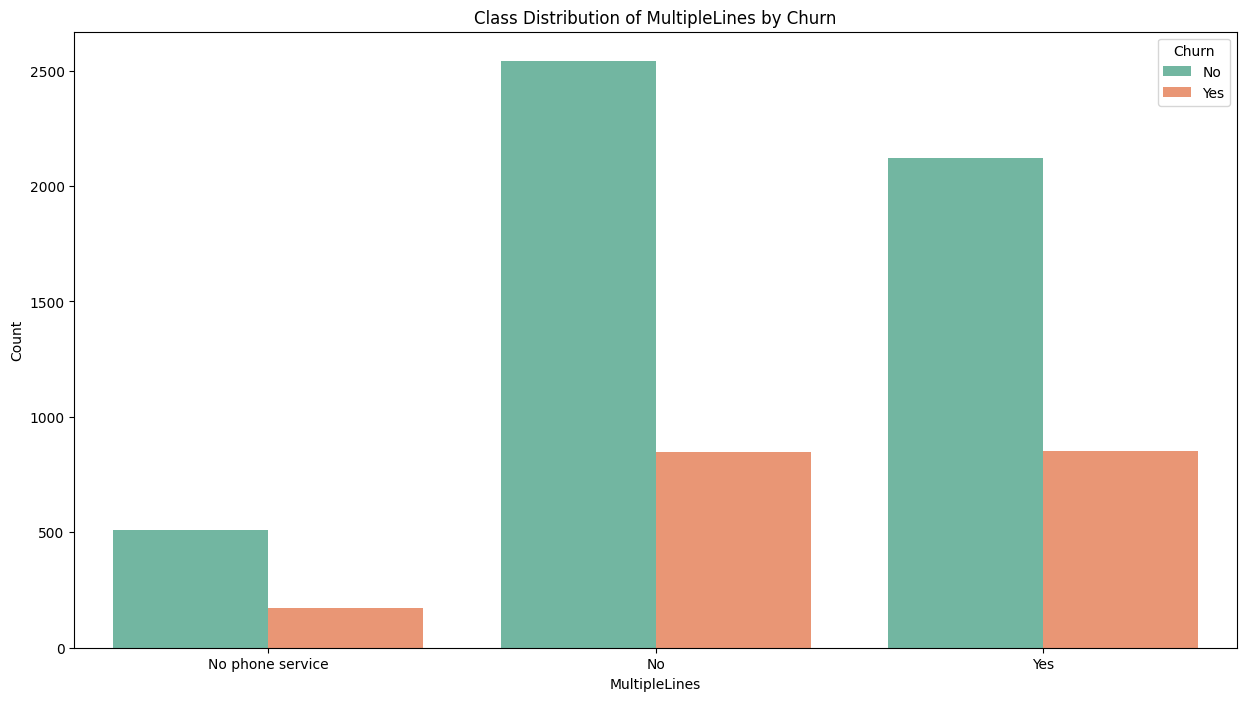

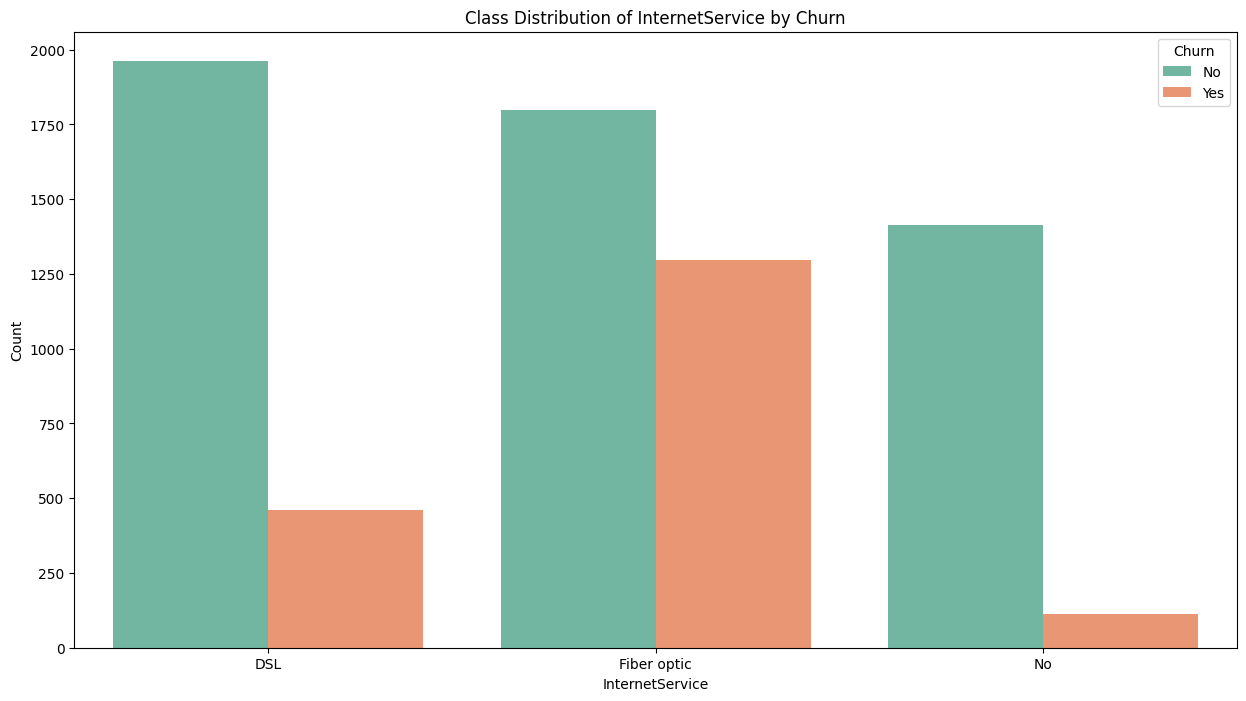

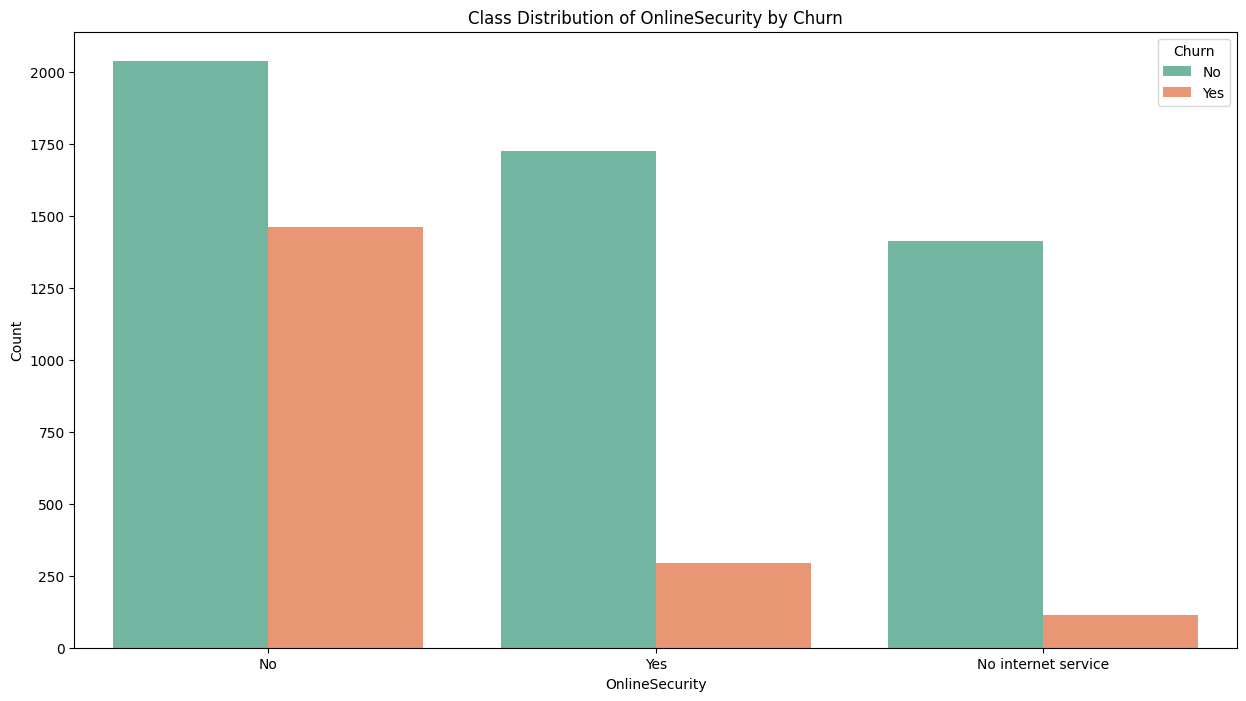

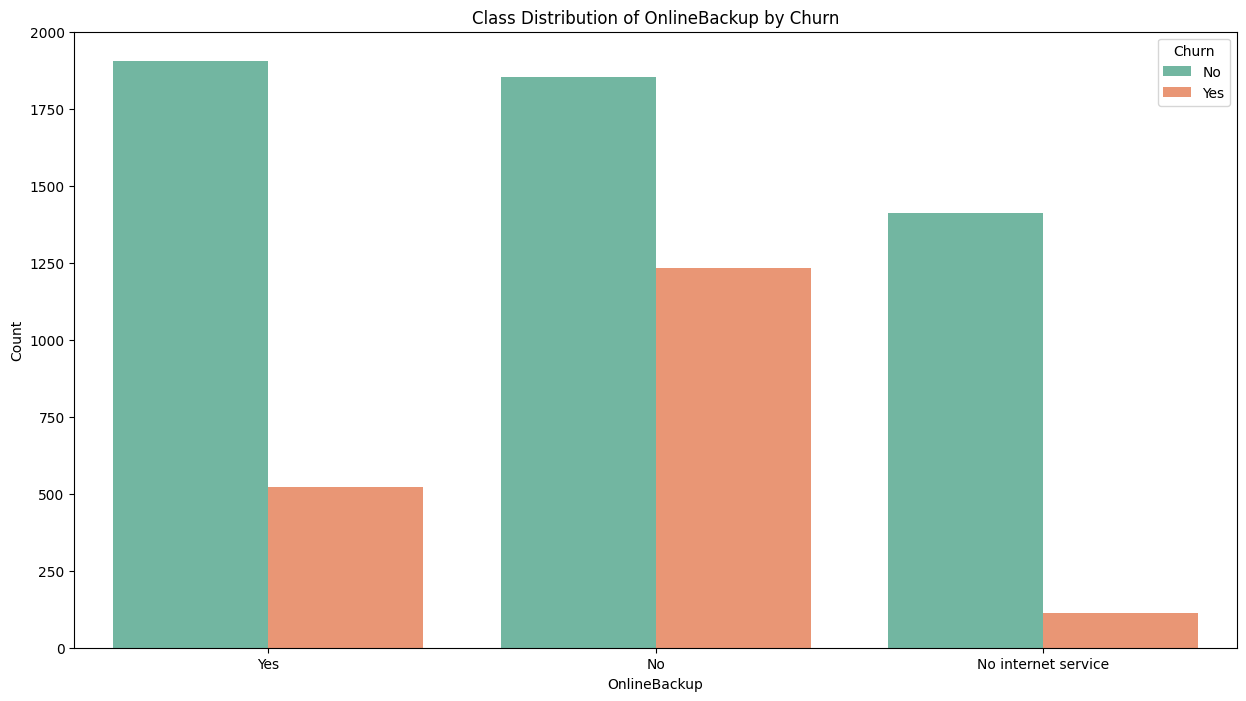

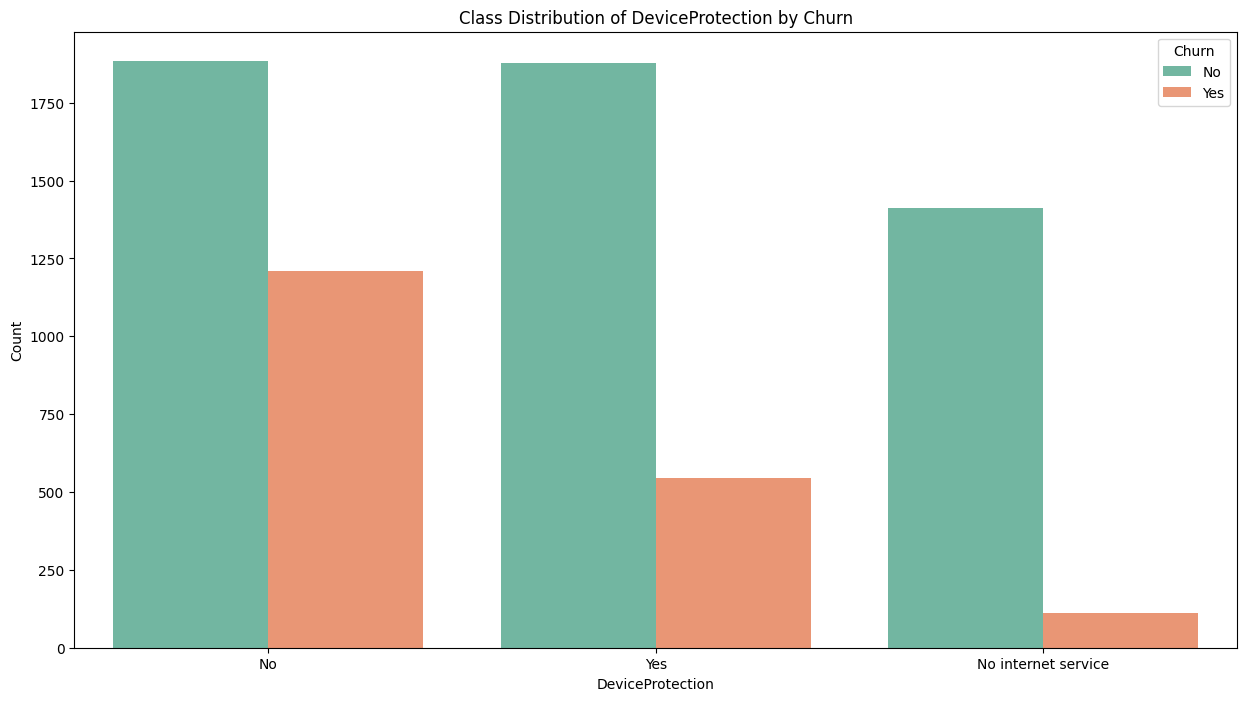

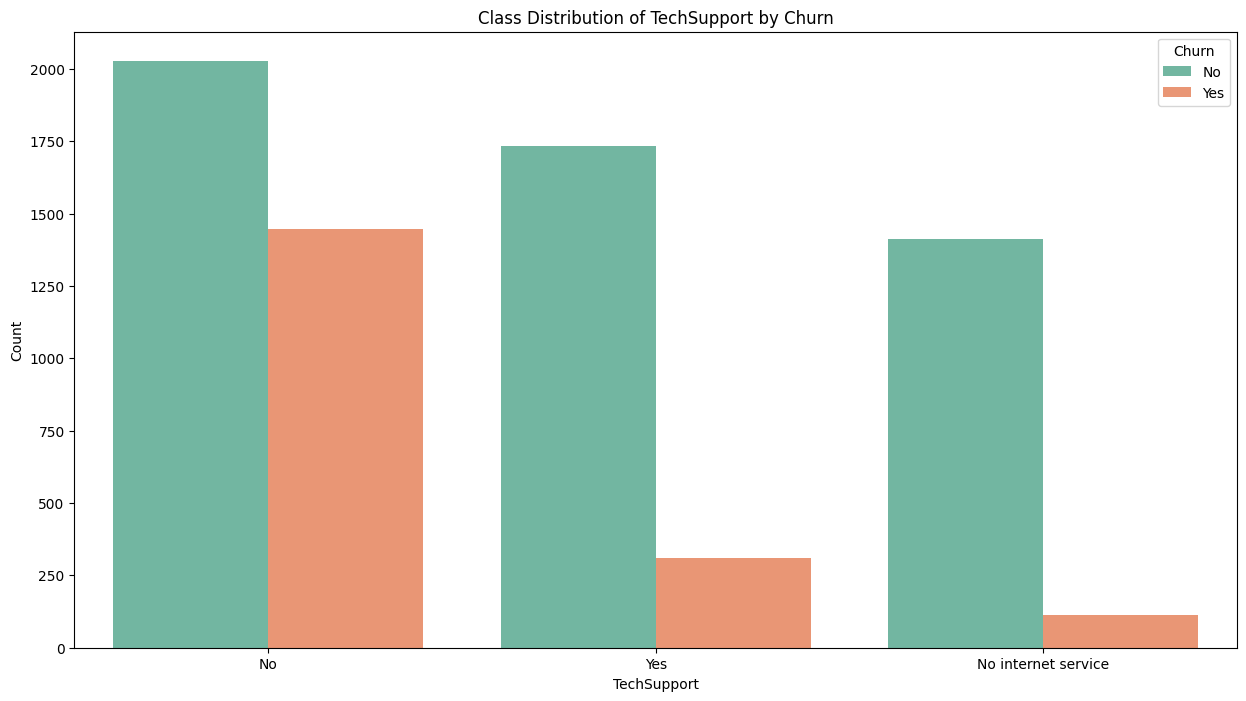

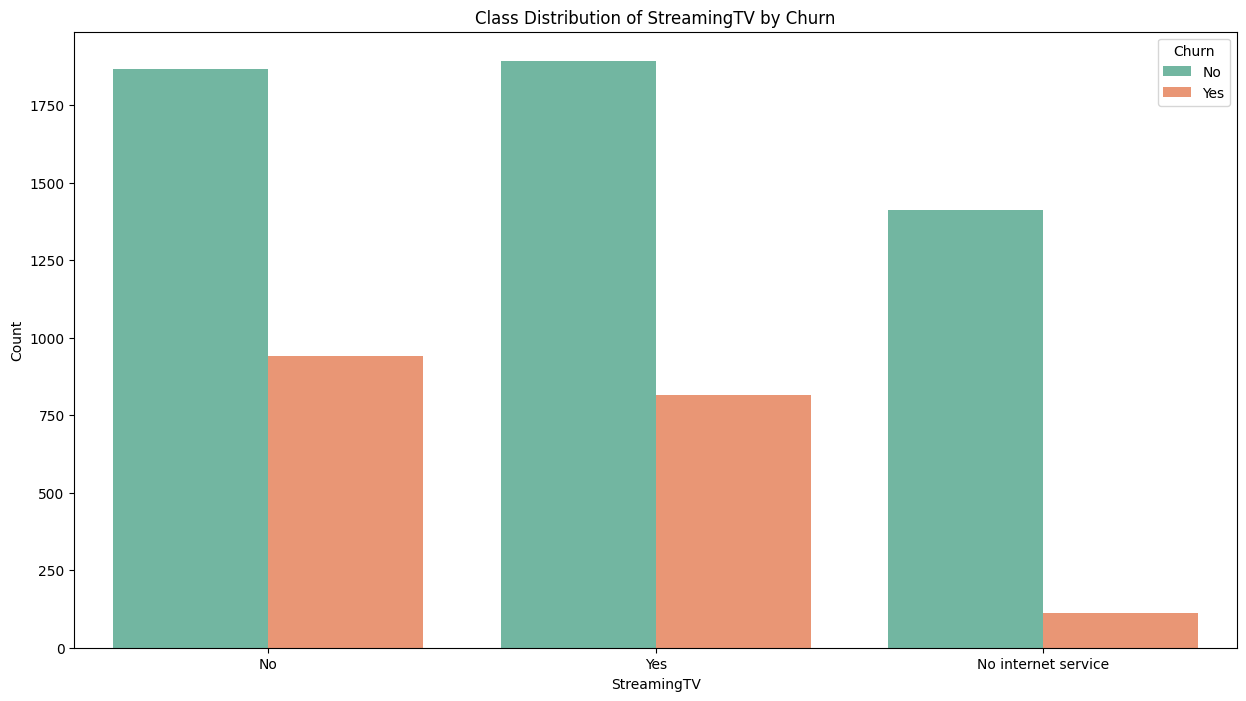

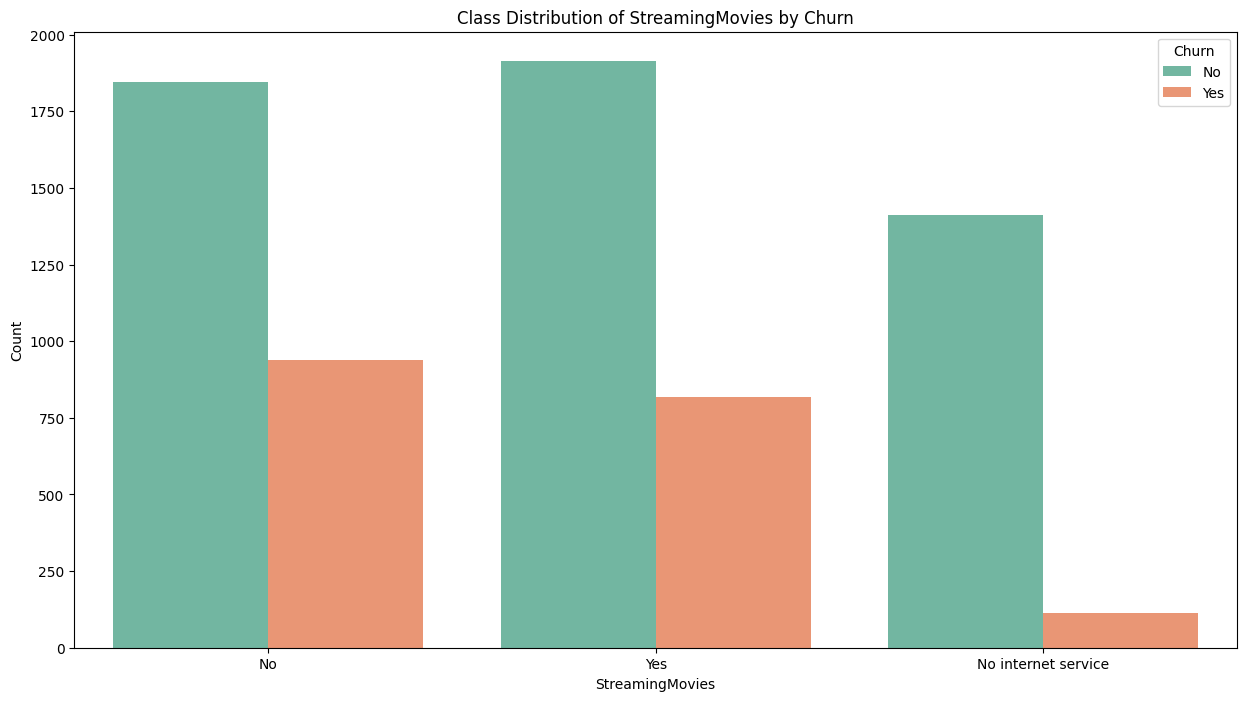

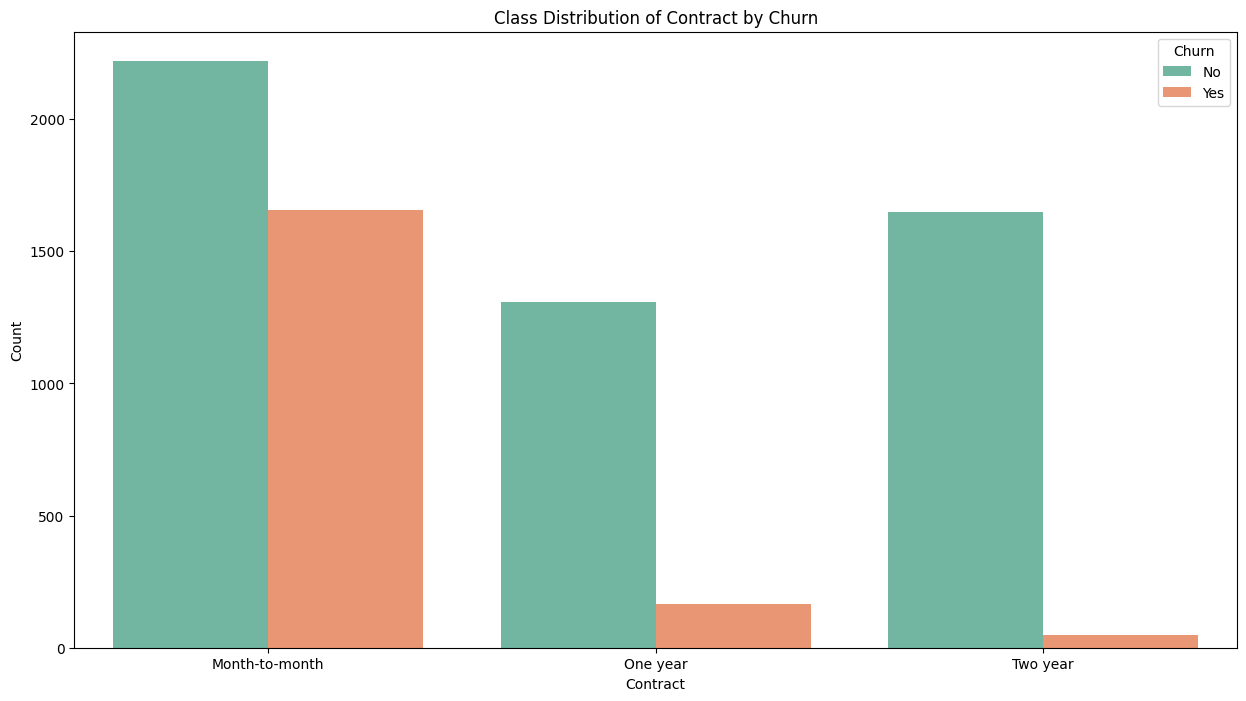

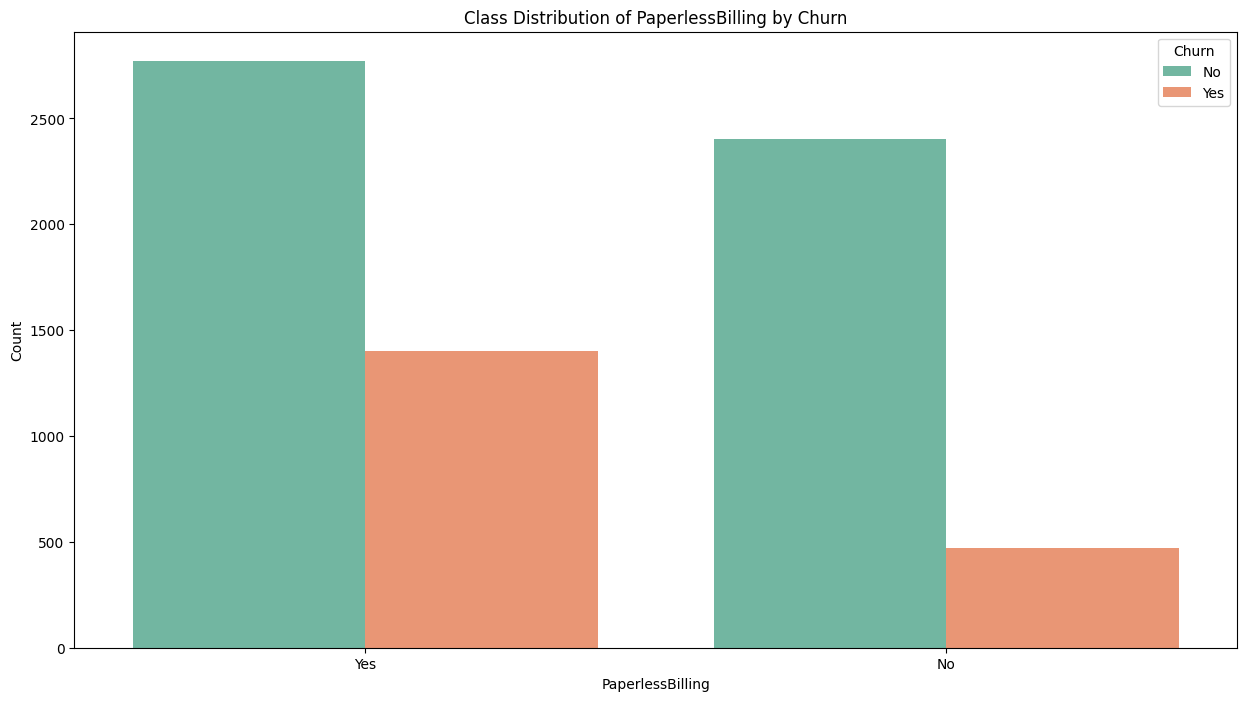

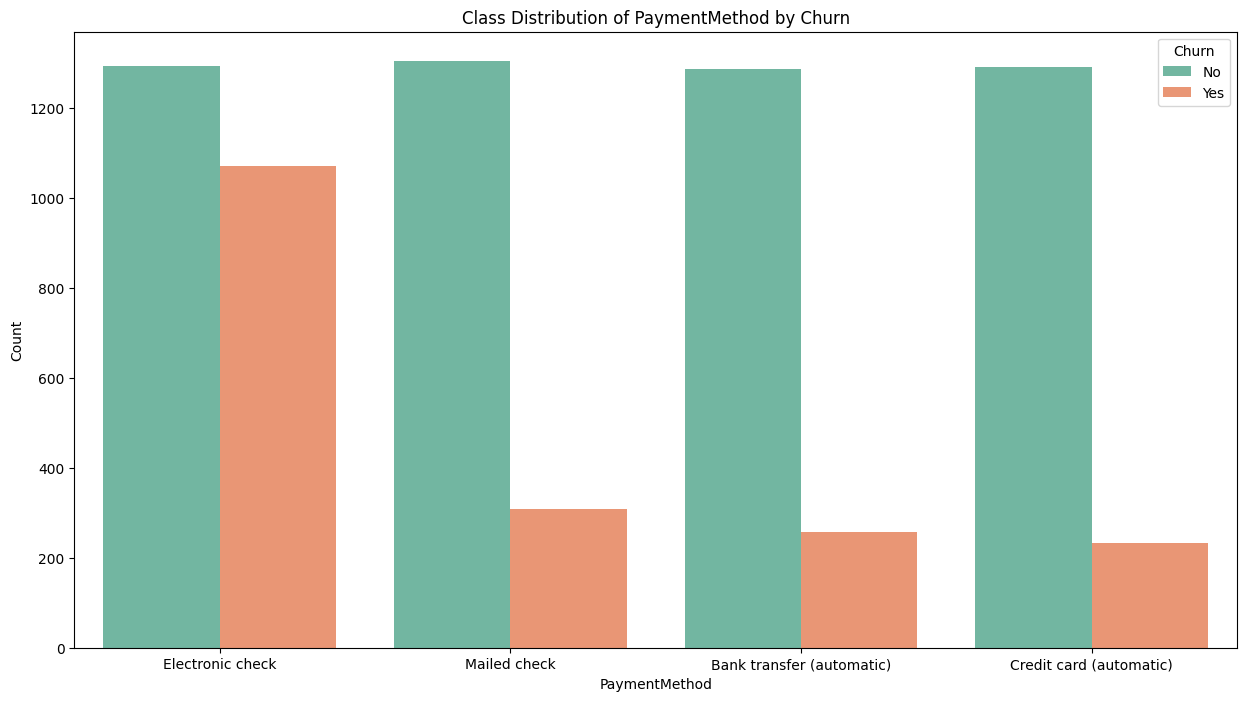

In [253]:
## YOUR CODE HERE
categorical_features=[]
for x in df.columns:
  if df[x].dtype=='object':
    categorical_features.append(x)

categorical_features = categorical_features[:-1]
target_variable = 'Churn'


for i, feature in enumerate(categorical_features, 1):
    plt.figure(figsize=(15,8))
    sns.countplot(x=feature, hue=target_variable, data=df, palette="Set2")

    plt.title(f'Class Distribution of {feature} by {target_variable}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


**1.4: Explain the distribution of the target variable and the dataset.**


<ipython-input-254-d331509def48>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_variable, data=df, palette="Set1")


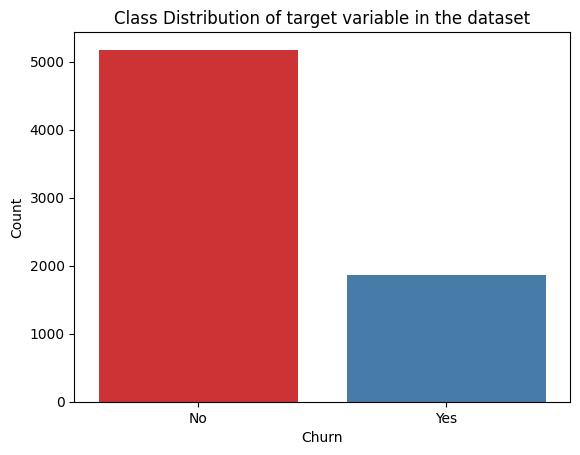

In [254]:
## YOUR CODE HERE
sns.countplot(x=target_variable, data=df, palette="Set1")
plt.title(f'Class Distribution of target variable in the dataset')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

**Add comment here**

We can see the presence of huge class imbalance in the dataset accross all features - The no.of 'No's is around ~2-3 times more than that of 'Yes'. One other thing is that, in all the classes of the categorical features the no.of 'No's is much higher than that of 'Yes'.

**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [255]:
## YOUR CODE HERE
# encode binary categorical features using OHE
X = df.drop(columns=['Churn'])
y = df['Churn']

y=y.map({'Yes': 1, 'No': 0})

cat_cols = ['PaymentMethod', 'Contract', 'StreamingMovies', 'StreamingTV', 'TechSupport',
            'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'InternetService', 'MultipleLines']
cat_bin_cols=[x for x in X.columns if x not in cat_cols and X[x].dtype=='object']

encoder = OneHotEncoder(sparse_output=False)

encoded_values = encoder.fit_transform(X[cat_bin_cols])

encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(cat_bin_cols))

X = pd.concat([X.drop(columns=cat_bin_cols), encoded_df], axis=1)

X

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,34,No,DSL,Yes,No,Yes,No,No,No,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0,2,No,DSL,Yes,Yes,No,No,No,No,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0,2,No,Fiber optic,No,No,No,No,No,No,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
7039,0,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
7040,0,11,No phone service,DSL,Yes,No,No,No,No,No,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
7041,1,4,Yes,Fiber optic,No,No,No,No,No,No,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [256]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Target distribution in training set: \n{y_train.value_counts(normalize=True)}")
print(f"Target distribution in test set: \n{y_test.value_counts(normalize=True)}")

Target distribution in training set: 
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Target distribution in test set: 
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


**Add comment here**

I used stratification as it ensures that each class is proportionally represented in both the training (development) and test datasets. This is particularly important when there is class imbalance, as it helps maintain a similar distribution of the target variable in both sets.


**1.6: Would you drop any column? Justify your reasoning.**

**Preprocess the data (Handle the Categorical Variable). Would you consider a mix of encoding techniques? Please briefly justify.
Do we need to apply scaling? Please briefly Justify**.

In [257]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3738 to 5639
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         5634 non-null   int64  
 1   tenure                5634 non-null   int64  
 2   MultipleLines         5634 non-null   object 
 3   InternetService       5634 non-null   object 
 4   OnlineSecurity        5634 non-null   object 
 5   OnlineBackup          5634 non-null   object 
 6   DeviceProtection      5634 non-null   object 
 7   TechSupport           5634 non-null   object 
 8   StreamingTV           5634 non-null   object 
 9   StreamingMovies       5634 non-null   object 
 10  Contract              5634 non-null   object 
 11  PaymentMethod         5634 non-null   object 
 12  MonthlyCharges        5634 non-null   float64
 13  TotalCharges          5634 non-null   float64
 14  gender_Female         5634 non-null   float64
 15  gender_Male           5

In [258]:
## YOUR CODE HERE
encoder = TargetEncoder(cols=cat_cols)
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

X_train.head()


,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes
3738,0,35,0.241503,0.186887,0.419378,0.401310,0.227926,0.417539,0.305378,0.300499,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3151,0,15,0.250279,0.420862,0.144177,0.401310,0.389563,0.417539,0.331087,0.336040,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4860,0,13,0.241503,0.186887,0.144177,0.215875,0.389563,0.151607,0.331087,0.336040,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3867,0,26,0.250279,0.186887,0.419378,0.215875,0.227926,0.417539,0.305378,0.300499,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3810,0,1,0.250279,0.186887,0.419378,0.401310,0.389563,0.417539,0.331087,0.336040,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [259]:
X_test.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes
437,0,72,0.287866,0.420862,0.144177,0.215875,0.227926,0.151607,0.305378,0.300499,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2280,1,8,0.287866,0.420862,0.419378,0.401310,0.389563,0.151607,0.305378,0.300499,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2235,0,41,0.287866,0.186887,0.144177,0.215875,0.227926,0.417539,0.305378,0.336040,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4460,0,18,0.250279,0.420862,0.419378,0.401310,0.227926,0.151607,0.331087,0.336040,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3761,0,72,0.287866,0.186887,0.144177,0.215875,0.227926,0.417539,0.305378,0.300499,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


**Add comment here**

Yes, I would use a combination of encoders. I have used OHE for categorical features with binary classes and Target encoding on the rest of the categorical features. I didn't prefer creating new columns for every categorical feature which will lead to increased model complexity given that it already has a lot of features and majority of them are categorical. Also, I would like to know how much each feature contributes to the model and not how much each class of a categorical feature contributes to the model. Hence, I chose a combination of Target Encoding and OHE.


No, Tree-based models like Decision Trees, Random Forests, and Gradient Boosting don't require scaling. The reason we normalize in linear models is because the feature itself is part of the optimization math to tune its coefficient. So if one feature is 10x bigger on average than the others, it's coefficient would be updated with much bigger changes so we must normalize.

Since tree based models only use the features as splits, like is feature A > 0 it doesn't matter if the features are normalized.

Removing highly correlated features is not a necessity in tree-based models as they are resilient to the presence of multi-collinearity. It is because they do not require or assume a particular relationship between the independent variables, in contrast to linear regression models. As a result, they can generate accurate predictions even in situations where there is a high level of correlation between some variables.

Multicollinearity is handled implicitly through the feature selection process - Feature Importance, Splitting Criteria, Tree Structure.

However for those highly correlated features, it is reasonable to get rid of one of them for model conciseness, Interpretability, to handle Overfitting and to bring down model training time.

I've removed some features that were created as an outcome of one-hot encoding features with only 2 classes (redundant). So having one class of each feature is more than enough because for ex: Gender_Male will be 1 for a row and Gender_Female will be 0.

Text(0.5, 1.0, 'Correlation Matrix')

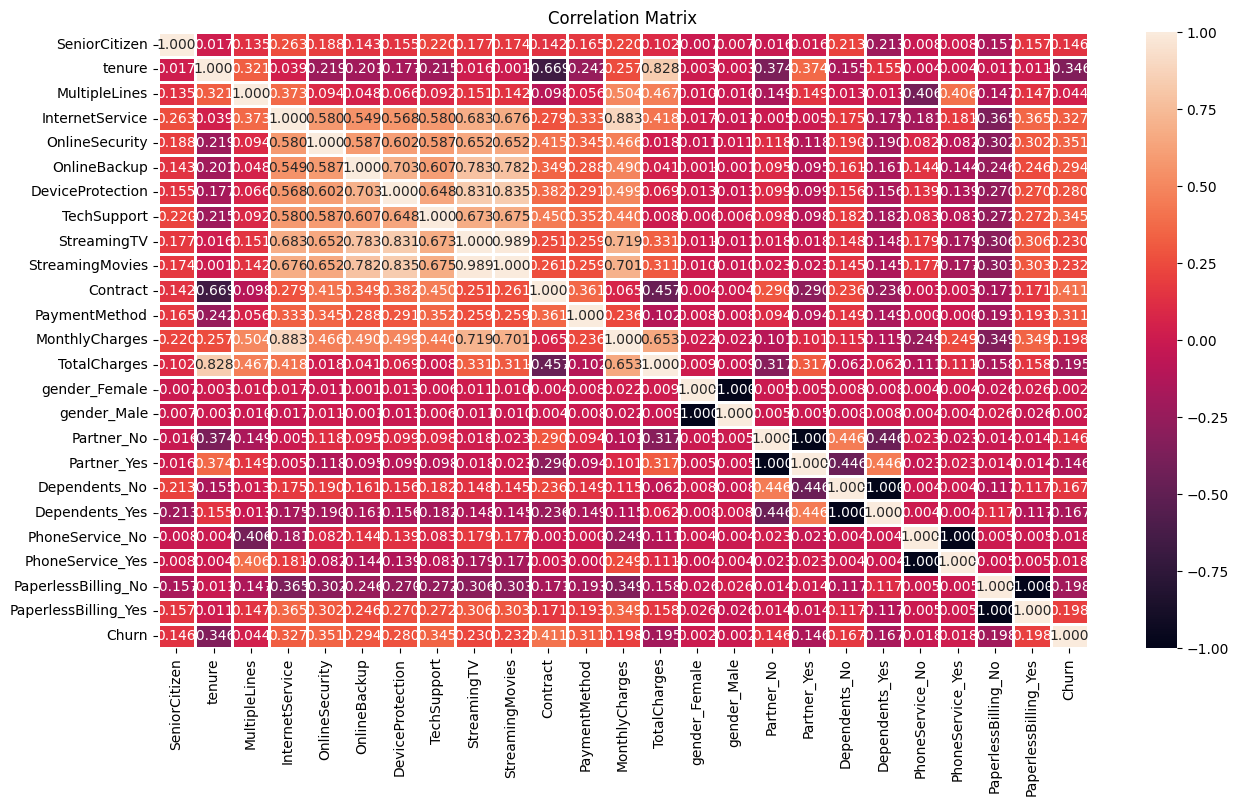

In [260]:

plt.figure(figsize=(15,8))
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(), annot=True, fmt='.3f',linewidths=1)
plt.title('Correlation Matrix')

In [261]:
X_train.drop(['StreamingTV', 'PhoneService_No', 'PaperlessBilling_No', 'Dependents_No', 'Partner_No', 'gender_Female'], axis=1, inplace=True)
X_train

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
3738,0,35,0.241503,0.186887,0.419378,0.401310,0.227926,0.417539,0.300499,0.427466,0.457430,49.20,1701.65,1.0,0.0,0.0,0.0,0.0
3151,0,15,0.250279,0.420862,0.144177,0.401310,0.389563,0.417539,0.336040,0.427466,0.192846,75.10,1151.55,1.0,1.0,1.0,1.0,0.0
4860,0,13,0.241503,0.186887,0.144177,0.215875,0.389563,0.151607,0.336040,0.028698,0.192846,40.55,590.35,1.0,1.0,1.0,0.0,0.0
3867,0,26,0.250279,0.186887,0.419378,0.215875,0.227926,0.417539,0.300499,0.028698,0.149217,73.50,1905.70,0.0,1.0,0.0,1.0,1.0
3810,0,1,0.250279,0.186887,0.419378,0.401310,0.389563,0.417539,0.336040,0.427466,0.457430,44.55,44.55,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0,71,0.287866,0.420862,0.419378,0.215875,0.227926,0.151607,0.300499,0.028698,0.457430,109.25,7707.70,0.0,1.0,0.0,1.0,0.0
6227,0,2,0.250279,0.186887,0.419378,0.401310,0.389563,0.417539,0.336040,0.427466,0.161576,46.05,80.35,1.0,0.0,0.0,1.0,0.0
4673,1,25,0.287866,0.420862,0.144177,0.215875,0.389563,0.417539,0.300499,0.427466,0.192846,102.80,2660.20,0.0,0.0,0.0,1.0,1.0
2710,0,24,0.250279,0.072488,0.072488,0.072488,0.072488,0.072488,0.072488,0.110827,0.149217,20.40,482.80,0.0,1.0,0.0,1.0,0.0


In [262]:
X_test.drop(['StreamingTV', 'PhoneService_No', 'PaperlessBilling_No', 'Dependents_No', 'Partner_No', 'gender_Female'], axis=1, inplace=True)
X_test

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
437,0,72,0.287866,0.420862,0.144177,0.215875,0.227926,0.151607,0.300499,0.028698,0.149217,114.05,8468.20,1.0,1.0,1.0,1.0,1.0
2280,1,8,0.287866,0.420862,0.419378,0.401310,0.389563,0.151607,0.300499,0.427466,0.149217,100.15,908.55,0.0,0.0,0.0,1.0,1.0
2235,0,41,0.287866,0.186887,0.144177,0.215875,0.227926,0.417539,0.336040,0.110827,0.149217,78.35,3211.20,0.0,1.0,1.0,1.0,1.0
4460,0,18,0.250279,0.420862,0.419378,0.401310,0.227926,0.151607,0.336040,0.427466,0.457430,78.20,1468.75,1.0,1.0,0.0,1.0,0.0
3761,0,72,0.287866,0.186887,0.144177,0.215875,0.227926,0.417539,0.300499,0.028698,0.149217,82.65,5919.35,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,0,49,0.250279,0.186887,0.144177,0.215875,0.227926,0.151607,0.300499,0.110827,0.192846,87.20,4345.00,0.0,1.0,1.0,1.0,1.0
4439,0,28,0.250279,0.072488,0.072488,0.072488,0.072488,0.072488,0.072488,0.028698,0.149217,20.30,487.95,1.0,1.0,1.0,1.0,1.0
3857,0,5,0.250279,0.072488,0.072488,0.072488,0.072488,0.072488,0.072488,0.427466,0.161576,20.65,93.55,1.0,0.0,0.0,1.0,0.0
4758,0,56,0.250279,0.072488,0.072488,0.072488,0.072488,0.072488,0.072488,0.028698,0.161576,19.70,1051.90,0.0,0.0,0.0,1.0,0.0


**1.7: Fit a Decision Tree on the development data until all leaves are pure. Which scoring metric will you prefer, and why? What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

* Accuracy = (True Positive + True Negative) / Total Observation - Good for balanced classes
* Precision = True Positive / (True Positive + False Positive)
* Recall = True Positive / (True Positive + False Negative)
* F-1 = 2 * (Precision * Recal) / (Precision + Recall) - Adjust for inbalance classes



In [263]:
## YOUR CODE HERE
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [264]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of training data: {accuracy_train}')
print(f'Accuracy of testing data: {accuracy_test}')

Accuracy of training data: 0.9980475683351083
Accuracy of testing data: 0.7359829666430092


In [265]:
report_train=classification_report(y_train, y_pred_train)
print(report_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      0.99      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [266]:
report_test=classification_report(y_test, y_pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1035
           1       0.50      0.51      0.51       374

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



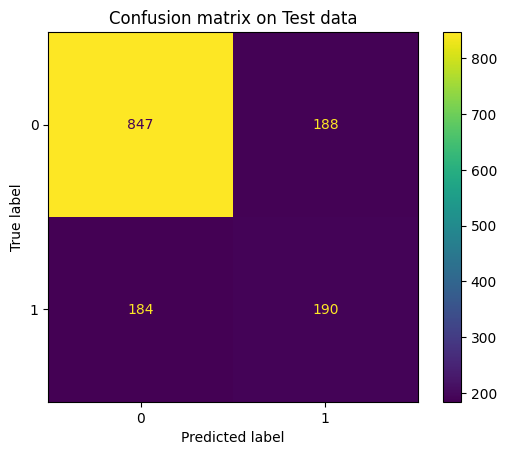

In [267]:
cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.title("Confusion matrix on Test data")
plt.show()

**Add comment here**

The model shows signs of Overfitting as the train accuracy is close to 100% but test accuracy is only around 74%. One reason this could happen is because of fitting a Decision Tree until all leaves are pure (where the model fits the noise in the data). This can be especially problematic with imbalanced datasets.

For class-imbalanced datasets, I would prefer either:

F1-score: because it balances precision and recall, ensuring that either the false positives or false negatives aren't overlooked. It's especially useful when the class distribution is highly skewed.

Precision-Recall AUC: If the goal is to know more about the performance with respect to the minority class, Precision-Recall AUC might be more informative.

Accuracy is the least prefered as predicting the majority class for every instance can still yield a high accuracy, even if the model performs poorly on the minority class.
For example, if 90% of the data belongs to class 0, predicting only class 0 will give 90% accuracy, but the model might be completely failing at predicting the minority class (class 1).

**1.8: Visualize the trained tree until the suitable max_depth.**

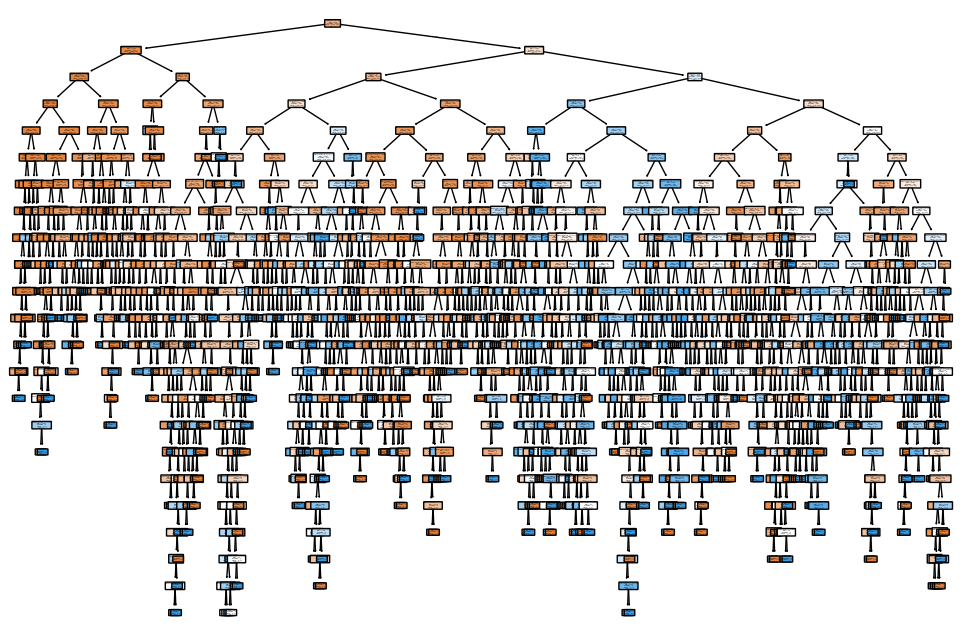

In [268]:
## YOUR CODE HERE
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=clf.feature_names_in_, class_names=[str(x) for x in clf.classes_] , rounded=True)
plt.show()

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

In [269]:
## YOUR CODE HERE
pipe=make_pipeline(GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=[{"max_depth":np.arange(1,10)}],
                                return_train_score=True))
pipe.fit(X_train, y_train)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
                              return_train_score=True))])

In [270]:
gs_results=pipe.named_steps["gridsearchcv"]

print (f"Best score:", gs_results.best_score_)
print (f"Best alpha:", gs_results.best_params_)
print (f"Test score:", pipe.score (X_test, y_test))

Best score: 0.7878942665180985
Best alpha: {'max_depth': 3}
Test score: 0.7821149751596878


**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [271]:
## YOUR CODE HERE
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [272]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of training data: {accuracy_train}')
print(f'Accuracy of testing data: {accuracy_test}')

Accuracy of training data: 0.7914447994320198
Accuracy of testing data: 0.7821149751596878


In [273]:
report_train=classification_report(y_train, y_pred_train)
print(report_train)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4139
           1       0.71      0.36      0.48      1495

    accuracy                           0.79      5634
   macro avg       0.76      0.65      0.67      5634
weighted avg       0.78      0.79      0.77      5634



In [274]:
report_test=classification_report(y_test, y_pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1035
           1       0.67      0.35      0.46       374

    accuracy                           0.78      1409
   macro avg       0.74      0.65      0.66      1409
weighted avg       0.77      0.78      0.76      1409



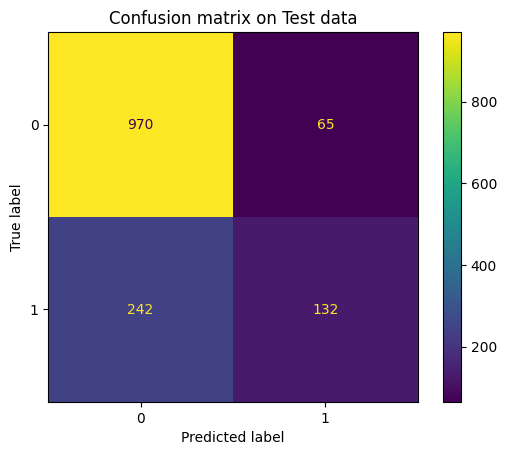

In [275]:
cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.title("Confusion matrix on Test data")
plt.show()

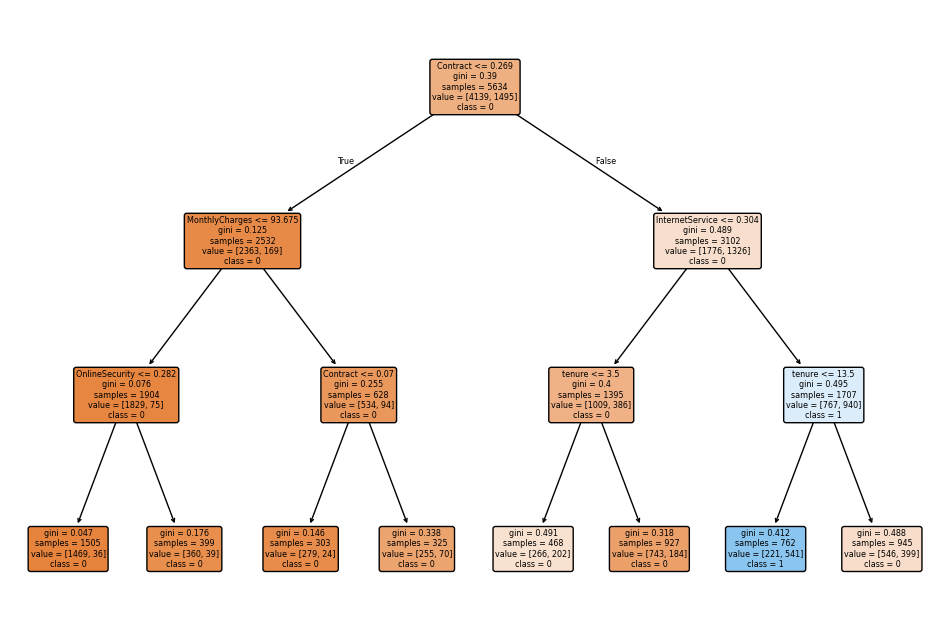

In [276]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=clf.feature_names_in_, class_names=[str(x) for x in clf.classes_] , rounded=True)
plt.show()

In [277]:
importances = clf.feature_importances_

feature_names = clf.feature_names_in_
sorted_indices = importances.argsort()[::-1]

for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")

Contract: 0.6118602334161983
InternetService: 0.19128944147774732
tenure: 0.1720737770996645
MonthlyCharges: 0.019070255949477338
OnlineSecurity: 0.005706292056912447
PaperlessBilling_Yes: 0.0
TechSupport: 0.0
MultipleLines: 0.0
OnlineBackup: 0.0
DeviceProtection: 0.0
StreamingMovies: 0.0
PhoneService_Yes: 0.0
PaymentMethod: 0.0
TotalCharges: 0.0
gender_Male: 0.0
Partner_Yes: 0.0
Dependents_Yes: 0.0
SeniorCitizen: 0.0


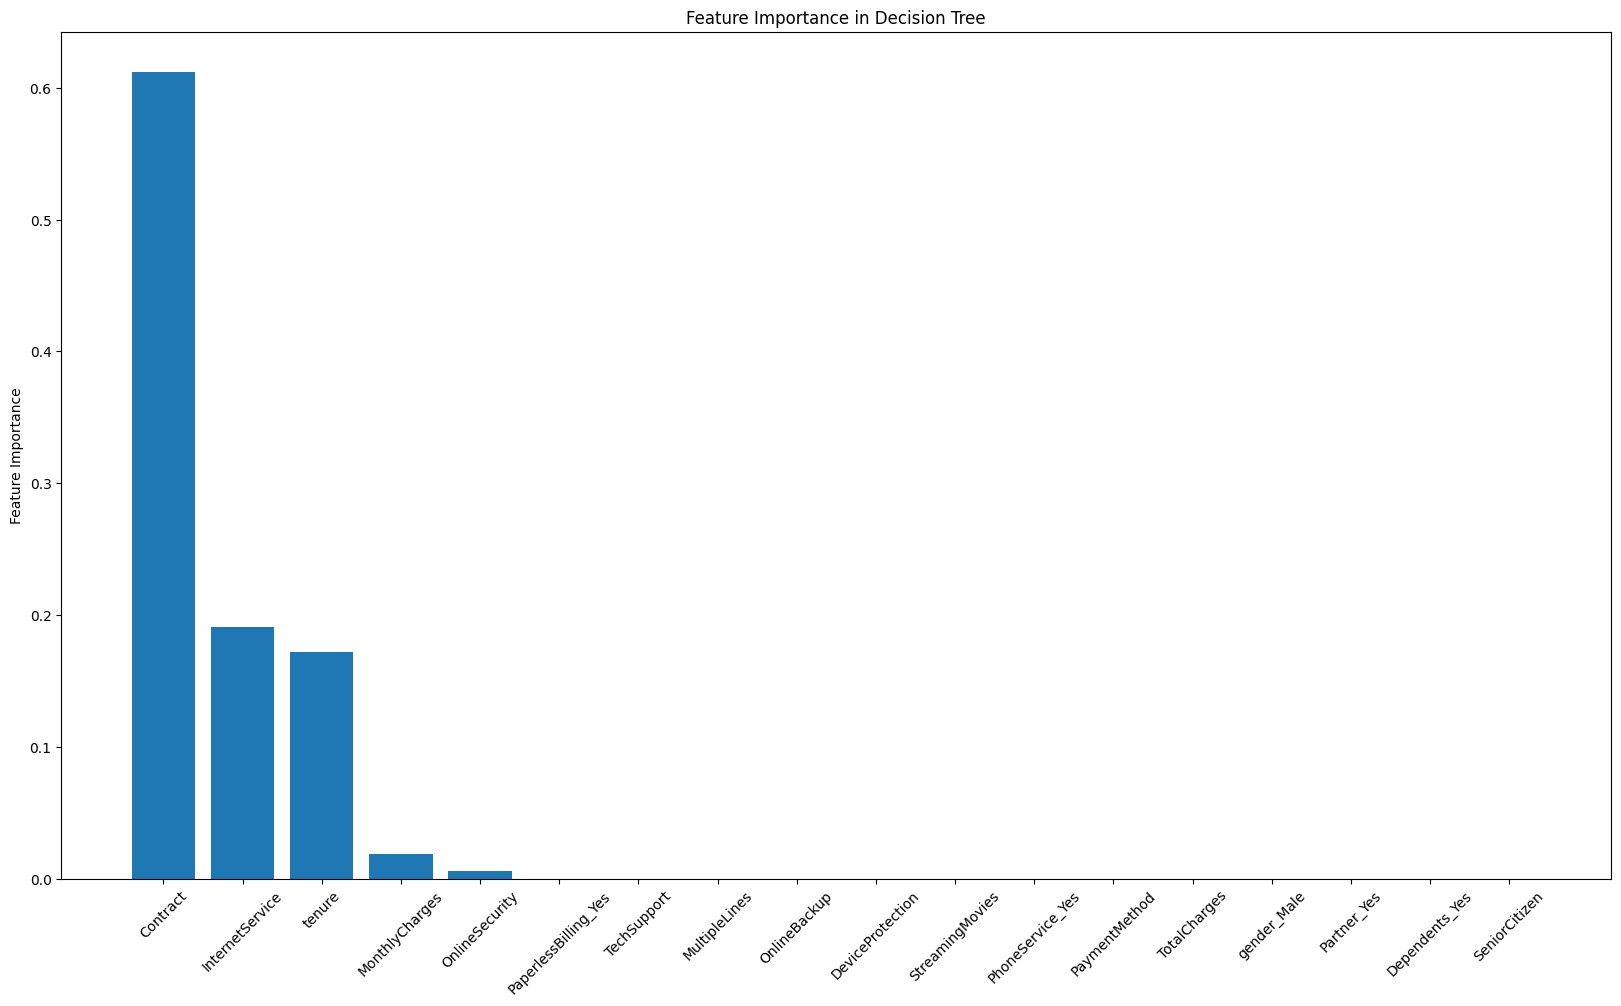

In [278]:
plt.figure(figsize=(20, 11))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_indices], rotation=45)
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()

**Add comment here**

The top 3 important features are Contract, InternetService and tenure. They have higher importance scores because they strongly influence the decision-making process in the decision tree algorithm. The tree might split on these features early in its structure because they contribute more to reducing impurity (e.g., Gini impurity or entropy). They could be a crucial factor in distinguishing between customers Churning or not.Another reason could be that they are comparitively more correlated to the target (Churn) compared to the rest of the predictors.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn (use random_state=42). Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [279]:
## YOUR CODE HERE
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [280]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of training data: {accuracy_train}')
print(f'Accuracy of testing data: {accuracy_test}')

Accuracy of training data: 0.9980475683351083
Accuracy of testing data: 0.7977288857345636


In [281]:
report_test=classification_report(y_test, y_pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



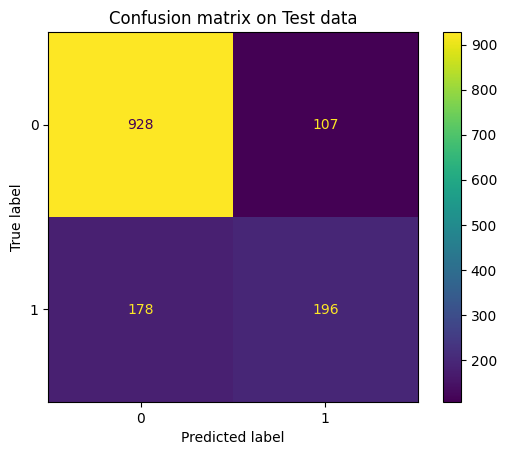

In [282]:
cm = confusion_matrix(y_test, y_pred_test, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.title("Confusion matrix on Test data")
plt.show()

**Add comment here**

Yes, it performs better than the Decision tree classifier from 1.7, both accuracy and F1-Score is better for the Random Forest classifier although Random Forest classifier does show signs of overfitting.

**2.2: Do all trees in the trained random forest model have pure leaves? Explain your results. How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [283]:
## YOUR CODE HERE
def check_pure_leaves(tree, X, y):
    leaf_nodes = tree.apply(X)
    unique_classes = [np.unique(y[leaf_nodes == leaf]) for leaf in range(tree.tree_.n_leaves)]
    return all(len(classes) == 1 for classes in unique_classes)

pure_leaves = [check_pure_leaves(tree, X_train, y_train) for tree in rf.estimators_]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: U

In [284]:

if all(pure_leaves):
    print("All trees have pure leaves.")
else:
    print("Not all trees have pure leaves.")

accuracy = rf.score(X_test, y_test)
print(f"Mean Accuracy of the Random Forest model: {accuracy}")

Not all trees have pure leaves.
Mean Accuracy of the Random Forest model: 0.7977288857345636


**Add comment here**

In a Random Forest Classifier, not all trees will necessarily have pure leaves. Whether a tree has pure leaves or not, depends on how the tree was constructed during training, specifically its depth and stopping criteria. Since, no stopping criteria is set, the decision tree can grow deeply and result in pure leaves which explain the high train accuracy and low test accuracy found above (Overfitting).

To verify if all trees in the trained random forest model have pure leaves, we can inspect each individual decision tree and check whether all of its leaves are pure. One way to do this is by extracting each tree structure and analyzing the leaf nodes of each tree.

For my trained random forest classifier, not all decision trees have pure leaves.

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


**Add comment here**

Random Forest has several hyperparameters that can significantly affect its performance. Among them, the two most important ones to tune, according to me, are typically n_estimators and max_depth because:

* n_estimators: This hyperparameter defines the number of trees in the forest. A higher number of trees usually leads to better model performance because it reduces variance by averaging the predictions of more individual trees. However, after a certain point, adding more trees may provide diminishing returns and increase computational cost. With too few trees, the model may underfit and fail to capture complex patterns. With too many trees, the model could become computationally expensive without significant gains in performance. Increasing the number of trees generally increases model stability and reduces the variance in predictions, improving accuracy on unseen data. We can use cross-validation to evaluate performance for different values (e.g., 100, 200, 500, 1000 trees) and select the best one.


* max_depth: This parameter controls how deep each individual decision tree can grow. A deep tree can learn intricate details from the training data, but it may also lead to overfitting. A shallow tree may underfit and fail to capture the complexity in the data. Since from the results of vanilla-Random forest implemented above we observed the presence of overfitting, limiting the decision trees as much from forming pure leaf nodes is important. Hence, max_depth is chosen.


Other Important Hyperparameters are:

* min_samples_split: Controls the minimum number of samples required to split an internal node. Increasing this number can prevent the tree from growing too deep and reduce overfitting.

* min_samples_leaf: The minimum number of samples required to be at a leaf node. Increasing this value forces the tree to make splits that are less specific to the training data, which can help with generalization.

* max_features: The maximum number of features to consider when looking for the best split. Reducing the number of features can help with generalization but may also limit the ability to find optimal splits.

* bootstrap: Whether to use bootstrap samples when building trees. Setting this to True helps randomize the tree-building process, making the model more robust.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

**Add comment here**

As for n_estimators, I would choose [100, 150, 200, 250, 300] and for max_depth, I would choose [5, 6, 7, 8, 9].

**2.5: Perform model selection using the chosen values for the hyperparameters (use random_state=42). Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [285]:
## YOUR CODE


n_estimators = [100, 150, 200, 250, 300]
max_depth = [5, 6, 7, 8, 9]
oob_scores = []
train_scores = []
test_scores = []
for estimators in n_estimators:
  for features in max_depth:
    rf = RandomForestClassifier(n_estimators=estimators, max_depth=features, random_state=42, oob_score=True)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)


In [286]:
best_index = oob_scores.index(max(oob_scores))
best_n_estimators = n_estimators[best_index//5]
best_max_depth = max_depth[best_index-(best_index//5)*5]
train_score = train_scores[best_index]
test_score = test_scores[best_index]

print(f"Random Forest best n_estimators: {best_n_estimators}")
print(f"Random Forest best max_depth: {best_max_depth}")
print(f"Random Forest best oob_score: {max(oob_scores)}")
print(f"Random Forest train_score: {train_score}")
print(f"Random Forest test_score: {test_score}")

Random Forest best n_estimators: 250
Random Forest best max_depth: 7
Random Forest best oob_score: 0.8054668086616968
Random Forest train_score: 0.8272985445509408
Random Forest test_score: 0.8090844570617459


In [287]:
rf_final = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=250, random_state=42)

In [288]:
y_pred_test = rf_final.predict(X_test)
y_pred_train = rf_final.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of training data: {accuracy_train}')
print(f'Accuracy of testing data: {accuracy_test}')

Accuracy of training data: 0.8272985445509408
Accuracy of testing data: 0.8090844570617459


In [289]:
report_test=classification_report(y_test, y_pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1035
           1       0.69      0.51      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



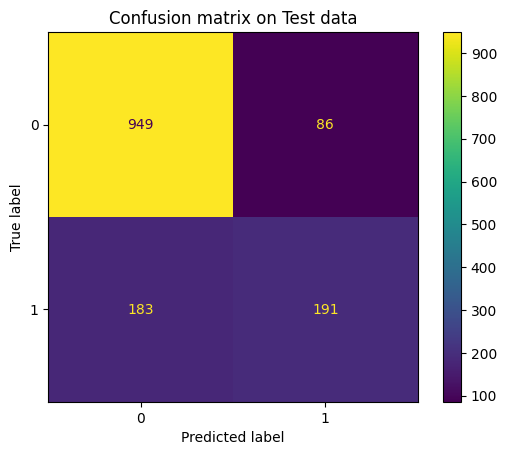

In [290]:
cm = confusion_matrix(y_test, y_pred_test, labels=rf_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_final.classes_)
disp.plot()
plt.title("Confusion matrix on Test data")
plt.show()

**Add comment here**

Yes, the performance improved over the plain-vanilla random forest model trained in Q2.1. The overfitting problem has been resolved after hypertunning and the test accuracy has also increased by ~0.005 and the F1-Score has also increased by 1. Perhaps, the difference isn't noteworthy but what is, is that the overfitting problem has been taken care of.

 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

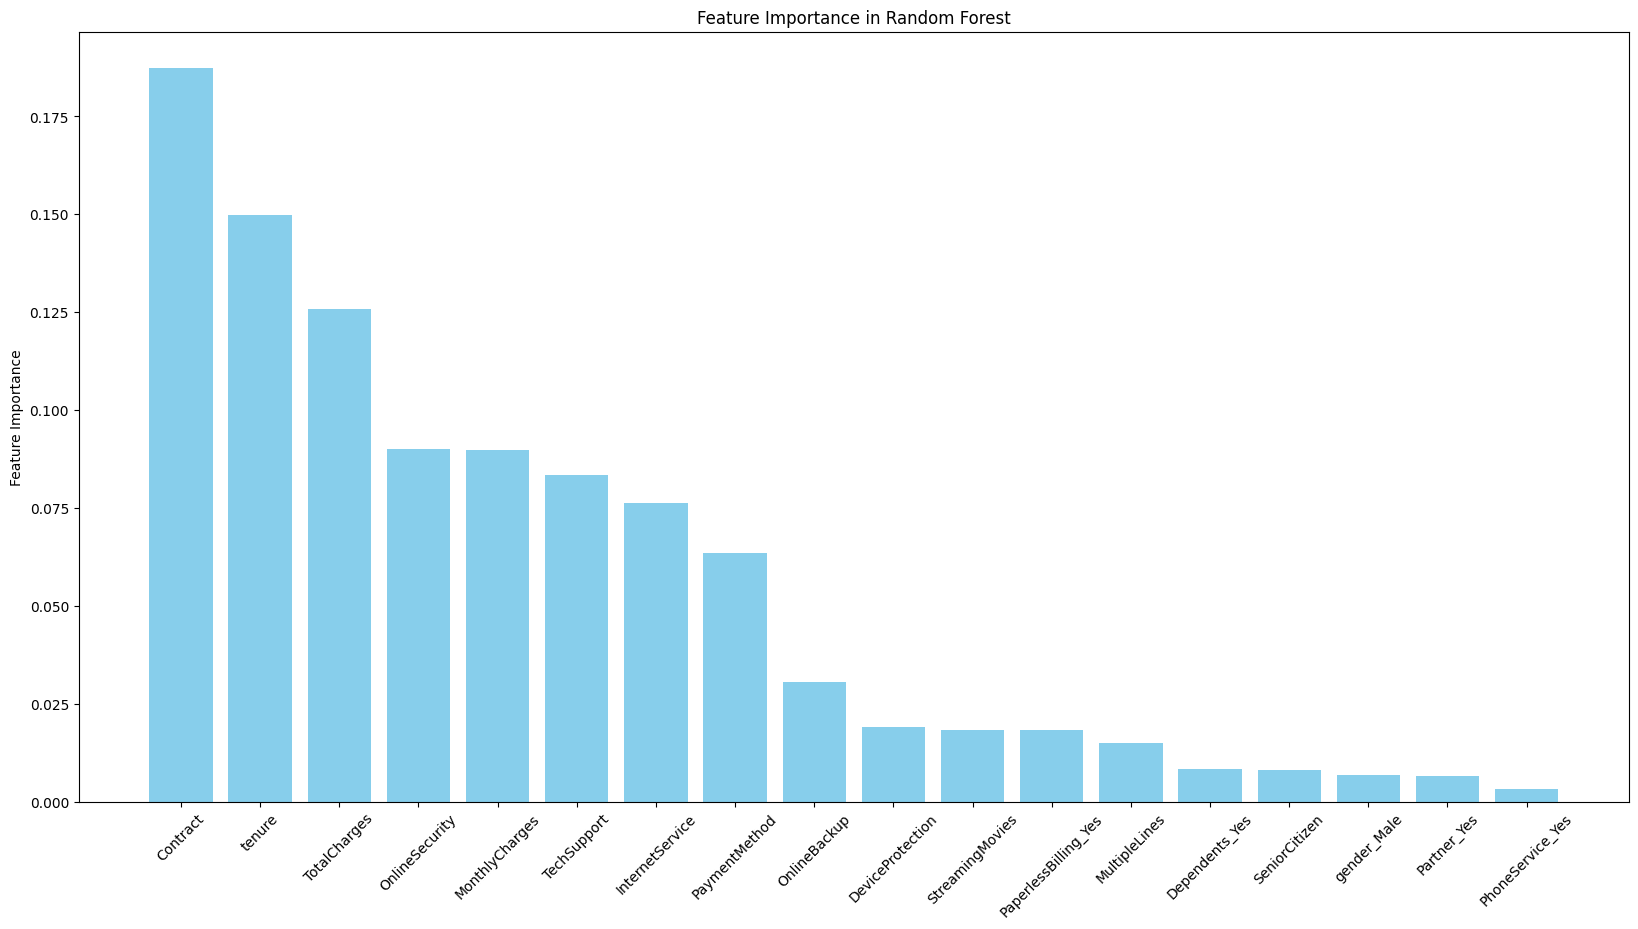

In [291]:
## YOUR CODE HERE
importances = rf_final.feature_importances_

importance_df = pd.DataFrame({
    'Feature': rf_final.feature_names_in_,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 10))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue', align='center')
plt.xticks(importance_df['Feature'], rotation=45)
plt.ylabel("Feature Importance")
plt.title('Feature Importance in Random Forest')
plt.show()

**Add comment here**

The top 3 most important features are Contract, tenure and TotalCharges. Both Contract and tenure are the same in both, but to me the set from random forest makes more sense because if the same internet service is provided for a lesser charge by another provider, then customers are most likely to churn. Also, because Random Forest model performs slightly better than that of the decision tree model. One reason why there's a difference in the feature importance is because a random forest aggregates the results of multiple decision trees, each of which may prioritize different features based on the random sampling of features during training, leading to a more robust and averaged view of feature importance across the ensemble, while a single decision tree can heavily rely on a few specific features depending on how the splits are made at each node (we can see that most of the features have ~0 importance).

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [292]:
## YOUR CODE HERE
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_iter': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

hgb = HistGradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=hgb, param_grid=param_grid, cv=5, verbose=1)

start_time = time.time()

grid_search.fit(X_train, y_train)

end_time = time.time()
time_taken = end_time - start_time

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Time taken for model selection (GridSearchCV): {time_taken:.2f} seconds")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred)


print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Train Set Accuracy: {accuracy_train:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Time taken for model selection (GridSearchCV): 25.81 seconds
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 50}
Best Cross-Validation Score: 0.8039
Train Set Accuracy: 0.8168
Test Set Accuracy: 0.7991


In [293]:
report_test=classification_report(y_test, y_pred)
print(report_test)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



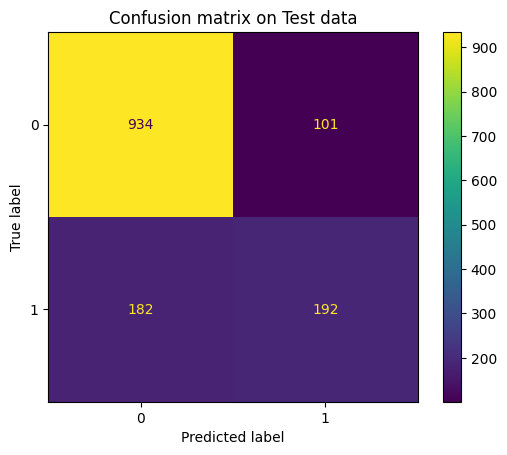

In [294]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot()
plt.title("Confusion matrix on Test data")
plt.show()

**Add comment here**

Time taken for model selection (GridSearchCV): 26.19 seconds
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 50}
Best Cross-Validation Score: 0.8039
Train Set Accuracy: 0.8168
Test Set Accuracy: 0.7991

**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT HAVE TO** choose the same hyperparameters as HistGradientBoostingClassifier.

In [295]:
## YOUR CODE HERE

xgb = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=1)

start_time = time.time()

grid_search.fit(X_train, y_train)

end_time = time.time()
time_taken = end_time - start_time

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Time taken for model selection (GridSearchCV): {time_taken:.2f} seconds")

best_model_xgb = grid_search.best_estimator_
y_pred = best_model_xgb.predict(X_test)
y_pred_train = best_model_xgb.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Train Set Accuracy: {accuracy_train:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Time taken for model selection (GridSearchCV): 14.31 seconds
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Cross-Validation Score: 0.8044
Train Set Accuracy: 0.8159
Test Set Accuracy: 0.8013


In [296]:
report_test=classification_report(y_test, y_pred)
print(report_test)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



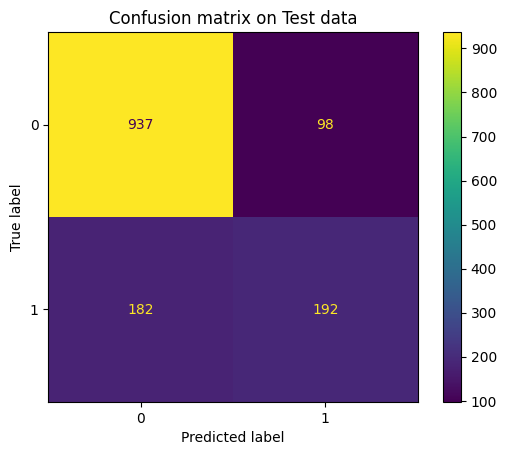

In [297]:
cm = confusion_matrix(y_test, y_pred, labels=best_model_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model_xgb.classes_)
disp.plot()
plt.title("Confusion matrix on Test data")
plt.show()

**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

**Add comment here**

From comparing the evaluation metrices of both, I prefer XGBoost as it has slightly higher F1-Score and test accuracy compared to HistGradientBoostingClassifier. Also from the confusion matrix, we can see that XGBoost predicts slightly more samples correctly as class '0' compared to HistGradientBoostingClassifier.

**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

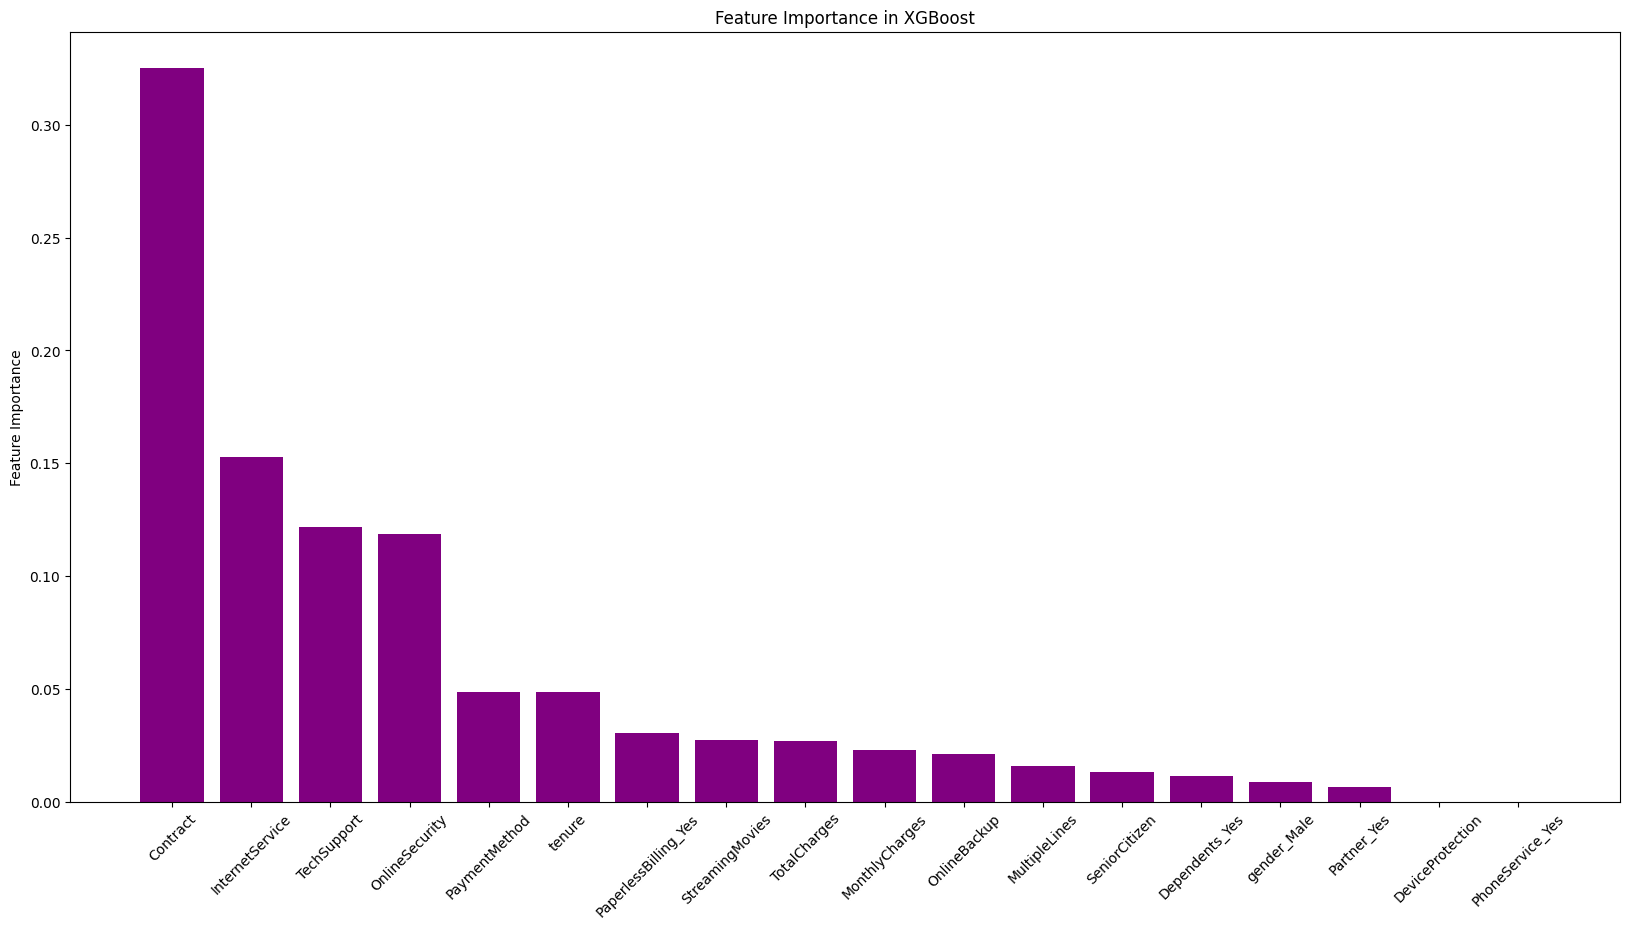

In [298]:
## YOUR CODE HERE

importances = best_model_xgb.feature_importances_

importance_df = pd.DataFrame({
    'Feature': best_model_xgb.feature_names_in_,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(20, 10))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='purple', align='center')
plt.xticks(importance_df['Feature'], rotation=45)
plt.ylabel("Feature Importance")
plt.title('Feature Importance in XGBoost')
plt.show()

**Add comment here**

The top 3 most important features are Contract, InternetService and TechSupport. Contract is the same for all and InternetService is the same as decision tree's and TechSupport is neither in decision tree or random forest's important feature list.

**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [299]:
importance_df['Feature'].values[0:5]

array(['Contract', 'InternetService', 'TechSupport', 'OnlineSecurity',
       'PaymentMethod'], dtype=object)

In [300]:
## YOUR CODE HERE
X_train_top5=X_train[importance_df['Feature'].values[0:5]]
X_test_top5=X_test[importance_df['Feature'].values[0:5]]
X_train_top5

,Contract,InternetService,TechSupport,OnlineSecurity,PaymentMethod
3738,0.427466,0.186887,0.417539,0.419378,0.457430
3151,0.427466,0.420862,0.417539,0.144177,0.192846
4860,0.028698,0.186887,0.151607,0.144177,0.192846
3867,0.028698,0.186887,0.417539,0.419378,0.149217
3810,0.427466,0.186887,0.417539,0.419378,0.457430
...,...,...,...,...,...
6303,0.028698,0.420862,0.151607,0.419378,0.457430
6227,0.427466,0.186887,0.417539,0.419378,0.161576
4673,0.427466,0.420862,0.417539,0.144177,0.192846
2710,0.110827,0.072488,0.072488,0.072488,0.149217


In [301]:
## YOUR CODE HERE

xgb = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=1)

start_time = time.time()

grid_search.fit(X_train_top5, y_train)

end_time = time.time()
time_taken = end_time - start_time

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Time taken for model selection (GridSearchCV): {time_taken:.2f} seconds")

best_model_xgb = grid_search.best_estimator_
y_pred = best_model_xgb.predict(X_test_top5)
y_pred_train = best_model_xgb.predict(X_train_top5)

accuracy_train = accuracy_score(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Train Set Accuracy: {accuracy_train:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Time taken for model selection (GridSearchCV): 8.36 seconds
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Best Cross-Validation Score: 0.7838
Train Set Accuracy: 0.7845
Test Set Accuracy: 0.7686


In [302]:
report_test=classification_report(y_test, y_pred)
print(report_test)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1035
           1       0.61      0.37      0.46       374

    accuracy                           0.77      1409
   macro avg       0.70      0.64      0.66      1409
weighted avg       0.75      0.77      0.75      1409



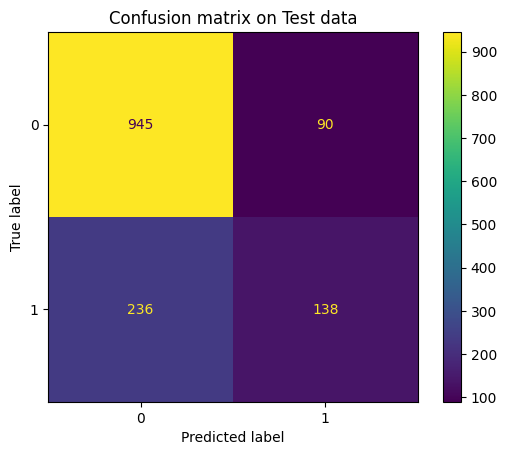

In [303]:
cm = confusion_matrix(y_test, y_pred, labels=best_model_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model_xgb.classes_)
disp.plot()
plt.title("Confusion matrix on Test data")
plt.show()

**Add comment here**

No, training the model only on the top 5 features doesn't give better results as from the feature importance barplot we can clearly see that the model not only depends on the top 5 but also on several other features. When we remove the rest of the  features a lot of information is lost eventhough they don't contribute as much as the top 5 but still they did contribute. This is the reason why the scores are less compared to the ones from 3.2 resulting in the incorrect classification of more than half of the minority class.